In [1]:
import csv
import re
from textblob import TextBlob
import time

# Troll Analysis

Parse the IRA-linked tweets for various patterns and generate visualizations.

In [2]:
def parse_tweet(tweet_text):
    """ 
    Remove links, special chars from tweet_text
    
    Args
    ------
    tweet_text : (str) Text of a tweet
    
    Returns
    ------
    (str) : Cleaned tweet
    """
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet_text).split())

## Gather tweets

Tweets are in CSV form, must be fetched from https://github.com/fivethirtyeight/russian-troll-tweets (warning, must use `git lfs` because big files)

In [3]:
class Tweet(object):
    
    def __init__(self, tweet_csv_obj):
        clean_tweet = parse_tweet(tweet_csv_obj['content'])
        self.tweet_text = clean_tweet
        self.region = tweet_csv_obj['region']
        self.language = tweet_csv_obj['language']
        self.publish_date = tweet_csv_obj['publish_date']
        self.author_following = tweet_csv_obj['following']
        self.author_followers = tweet_csv_obj['followers']
        self.account_type = tweet_csv_obj['account_type']
        self.account_category = tweet_csv_obj['account_category']
        self.author = tweet_csv_obj['author']
        self.retweets = tweet_csv_obj['retweet']
        self.sentiment = TextBlob(clean_tweet).sentiment.polarity
        
    def get_tweet_text():
        yield self.tweet_text

    def get_tweet_sentiment():
        yield self.sentiment

In [4]:
IRA_TWEETS = "./IRAhandle_tweets.csv"

In [5]:
tweets = []
start_time = time.time()
with open(IRA_TWEETS, 'r') as tweets_csv:
    tweet_reader = csv.DictReader(tweets_csv)
    for row in tweet_reader:
        tweets.append(Tweet(row))
time_taken = time.time() - start_time
print("Tweet Parsing took {} s".format(time_taken))

Tweet Parsing took 488.62445282936096 s


In [9]:
total_retweets = sum(int(_.retweets) for _ in tweets)

In [10]:
import matplotlib.pyplot as plt
from matplotlib import colors


(array([ 9464.,   328.,  1625.,   220.,  9709.,  2614.,  7574.,  2425.,
        11711.,  2302., 35937., 26170.,  7328., 29020.,  9165., 70651.,
        50564., 59587., 52096., 22512.]),
 array([-1.00000000e+00, -9.50000000e-01, -9.00000000e-01, -8.50000000e-01,
        -8.00000000e-01, -7.50000000e-01, -7.00000000e-01, -6.50000000e-01,
        -6.00000000e-01, -5.50000000e-01, -5.00000000e-01, -4.50000000e-01,
        -4.00000000e-01, -3.50000000e-01, -3.00000000e-01, -2.50000000e-01,
        -2.00000000e-01, -1.50000000e-01, -1.00000000e-01, -5.00000000e-02,
        -3.96508223e-18]),
 <a list of 20 Patch objects>)

/usr/local/anaconda3/envs/troll-analysis/lib/python3.7/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


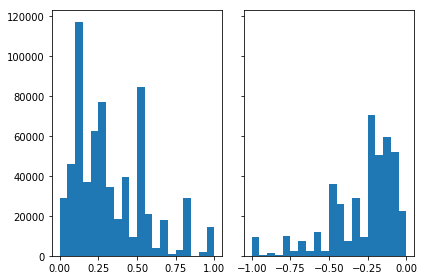

In [15]:
positive_tweets = list(filter(lambda tweet: tweet.sentiment > 0, tweets))
negative_tweets = list(filter(lambda tweet: tweet.sentiment < 0, tweets))

n_bins = 20
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

positive_sentiments = [_.sentiment for _ in positive_tweets]
negative_sentiments = [_.sentiment for _ in negative_tweets]
axs[0].hist(positive_sentiments, bins=n_bins)
axs[1].hist(negative_sentiments, bins=n_bins)